In [110]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
from numpy import var
%matplotlib inline

In [131]:
weibull = []
log_x_arr = np.arange(-2, 2, 0.001)
veris_f = [0.0] * len(log_x_arr)
file = open('Weibull.csv', 'r')
for line in file:
    for value in line.split():
      weibull.append(float(value))
file.close()  
for i in range(len(log_x_arr)):
    gamma = 10 ** log_x_arr[i]
    for x in weibull[0:1461]:
        if x == 0:
            x = 0.01 
        veris_f[i] = veris_f[i] + log_x_arr[i] - (x ** gamma) + (gamma - 1) * math.log(x)
    veris_f[i] = abs(veris_f[i])

Для половины выборки

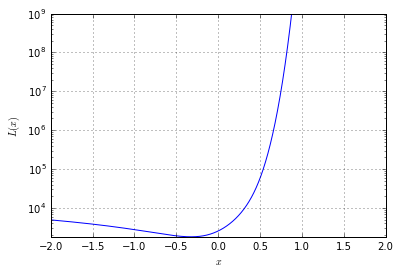

In [104]:
plt.semilogy(log_x_arr, veris_f)
plt.ylim(0, 10 ** 9)
plt.xlabel('$x$')
plt.ylabel('$L(x)$')
plt.grid()    

А теперь для всей выборки

In [118]:
for i in range(len(log_x_arr)):
    gamma = 10 ** log_x_arr[i]
    for x in weibull[0:3652]:
        if x == 0:
            x = 0.01 
        veris_f[i] = veris_f[i] + log_x_arr[i] - (x ** gamma) + (gamma - 1) * math.log(x)
    veris_f[i] = abs(veris_f[i])

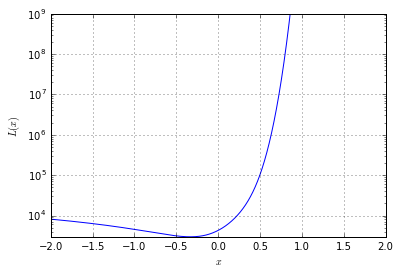

In [119]:

plt.semilogy(log_x_arr, veris_f)
plt.semilogy(log_x_arr, np.zeros(log_x_arr.shape))
plt.xlabel('$x$')
plt.ylabel('$L(x)$')
plt.ylim(0, 10 ** 9)
plt.grid() 

Найдем экстремум графика. Сначала вычислим минимальное значение, а затем разыщем координату!

In [120]:
minn = np.min(veris_f)
search_arr = np.arange(-2, -0.1, 0.001)
for i in range(len(search_arr)):
    if veris_f[i] == minn:
        verisimilitude = i
        break



И, наконец, вычислим оценку!

In [121]:
10 ** (-2 + verisimilitude * 0.001) 

0.4655860935229589